# Libraries and Data Import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

#Avoid warnings 
import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)
warnings.filterwarnings(action="ignore",category=DeprecationWarning)

#To see all the rows and columns
pd.pandas.set_option("display.max_rows",None)
pd.pandas.set_option("display.max_columns",None)

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

In [3]:
df1=pd.read_csv("LT_processed_data.csv")

In [4]:
#We have already taken care of NA values, Rare catogories and EDA. 
df1.head()

,NewDCFlag,NewRegionFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsMainstream,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,ProjectCategory,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,True,False,missing,missing,Azure,Compute,missing,False,Not Mainstream,False,Asia Pacific,Growth,20,800.0,99-ZZ No Priority,Azure Compute APAC,PRD,Southeast Asia,Not Restricted,Hero,0,PreRack,124.0,31.0
1,False,False,missing,missing,Azure,Storage,missing,False,Not Mainstream,False,Asia Pacific,Growth,20,280.0,99-ZZ No Priority,Azure Storage APAC,PRD,Southeast Asia,Not Restricted,Hero,0,PreRack,126.0,42.0
2,True,False,missing,missing,Azure,Compute,missing,False,Not Mainstream,False,Europe,Growth,20,800.0,99-ZZ No Priority,Azure Compute EMEA,PRD,West Europe,Not Restricted,Hero,0,PreRack,198.0,31.0
3,False,False,missing,missing,Azure,XIO Compute,missing,False,Not Mainstream,False,United States,Growth,20,880.0,99-ZZ No Priority,Azure Compute US,PRD,West US,Not Restricted,Hub,0,PreRack,207.0,49.0
4,False,False,missing,missing,Azure,Xtransport,missing,False,Not Mainstream,False,CHINA,Growth,1,14.0,99-ZZ No Priority,Rare_var,PRD,Rare_var,Restricted,Satellite,0,PreRack,737.0,49.0


In [5]:
#As per the observations in EDA, we are going to drop-IsMainstream,ProjectCategory,NewRegionFlag, since it contains a single catogory
df1.drop(["NewRegionFlag","IsMainstream","ProjectCategory"],axis=1,inplace=True)

In [11]:
#Expect DeploymentSeverity feature, all other are nominal. Only DeploymentSeverity is Ordinal 
#So lets use Lable encoder for DeploymentSeverity

d = {'missing':5,'high':2, 'medium':3,'low':4 }
df1["DeploymentSeverity"] = df1["DeploymentSeverity"].replace(d)

In [12]:
#Lest check the info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NewDCFlag                               1124 non-null   object 
 1   ColoReady At PlanReservationStart Flag  1124 non-null   object 
 2   DeploymentSeverity                      1124 non-null   int64  
 3   EngineeringGroup                        1124 non-null   object 
 4   PlanResourceTypeName                    1124 non-null   object 
 5   IsAddRack                               1124 non-null   object 
 6   IsFirstFootprint                        1124 non-null   object 
 7   IsNPI                                   1124 non-null   object 
 8   PlanGEO                                 1124 non-null   object 
 9   PlanIntentName                          1124 non-null   object 
 10  NumberOfRacks                           1124 non-null   int6

In [13]:
#Lest reset DataTypes of few Features(Convert Bool type as Object type)
bool_features_list= [feature for feature in df1.columns if df1[feature].dtype =="bool"]
add=["SKU Avaliable Flag","DeploymentSeverity"]
bool_features_list=bool_features_list+add

df1[bool_features_list] = df1[bool_features_list].astype('object')

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NewDCFlag                               1124 non-null   object 
 1   ColoReady At PlanReservationStart Flag  1124 non-null   object 
 2   DeploymentSeverity                      1124 non-null   object 
 3   EngineeringGroup                        1124 non-null   object 
 4   PlanResourceTypeName                    1124 non-null   object 
 5   IsAddRack                               1124 non-null   object 
 6   IsFirstFootprint                        1124 non-null   object 
 7   IsNPI                                   1124 non-null   object 
 8   PlanGEO                                 1124 non-null   object 
 9   PlanIntentName                          1124 non-null   object 
 10  NumberOfRacks                           1124 non-null   int6

In [16]:
df1.describe()

,NumberOfRacks,NumberOfServers,CT Signal to LIve,CT Signal to Dock
count,1124.000000,1124.000000,1124.000000,1124.000000
mean,11.868327,275.290036,182.361210,75.794484
std,8.126258,264.988461,102.797588,42.618329
min,1.000000,2.000000,15.000000,0.000000
25%,2.000000,40.000000,113.000000,49.000000
50%,10.000000,200.000000,155.000000,66.000000
75%,20.000000,450.000000,230.250000,99.000000
max,60.000000,2112.000000,895.000000,262.000000


In [17]:
df1.head() #PlanGEO and Region

,NewDCFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,True,missing,5,Azure,Compute,missing,False,False,Asia Pacific,Growth,20,800.0,99-ZZ No Priority,Azure Compute APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,124.0,31.0
1,False,missing,5,Azure,Storage,missing,False,False,Asia Pacific,Growth,20,280.0,99-ZZ No Priority,Azure Storage APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,126.0,42.0
2,True,missing,5,Azure,Compute,missing,False,False,Europe,Growth,20,800.0,99-ZZ No Priority,Azure Compute EMEA,West Europe,Not Restricted,Hero,0,PreRack,198.0,31.0
3,False,missing,5,Azure,XIO Compute,missing,False,False,United States,Growth,20,880.0,99-ZZ No Priority,Azure Compute US,West US,Not Restricted,Hub,0,PreRack,207.0,49.0
4,False,missing,5,Azure,Xtransport,missing,False,False,CHINA,Growth,1,14.0,99-ZZ No Priority,Rare_var,Rare_var,Restricted,Satellite,0,PreRack,737.0,49.0


In [27]:
#Lest encode rest of the catogorical features 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['EngineeringGroup', 'PlanResourceTypeName', 'RegionType', 'RegionGroup','Region','PlanPropertyGroupName',
      'PlanOrderPriorityName','IsFirstFootprint','IsAddRack','ColoReady At PlanReservationStart Flag',
       'RegionGroup', 'NewDCFlag','PlanIntentName', 'IsNPI','SKUCategoryName','PlanGEO']
       
df2=df1.copy()
df2[cols] = df1[cols].apply(le.fit_transform)

df2.shape

(1124, 21)

In [28]:
df2.head()

,NewDCFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,1,2,5,0,7,2,0,0,1,1,20,800.0,2,2,13,0,0,0,0,124.0,31.0
1,0,2,5,0,24,2,0,0,1,1,20,280.0,2,8,13,0,0,0,0,126.0,42.0
2,1,2,5,0,7,2,0,0,5,1,20,800.0,2,3,18,0,0,0,0,198.0,31.0
3,0,2,5,0,26,2,0,0,13,1,20,880.0,2,4,19,0,1,0,0,207.0,49.0
4,0,2,5,0,30,2,0,0,3,1,1,14.0,2,14,11,2,2,0,0,737.0,49.0


In [31]:
# Lets define X (Independent Variables)
x = df2.drop(["CT Signal to LIve","CT Signal to Dock"], axis=1)

# Putting response variable to y
y = df2['CT Signal to LIve']

#Lets split our data into training and testing sets. random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=100)

In [33]:
print (x_train.shape)
print (x_test.shape)

(843, 19)
(281, 19)


# Random Forest

In [64]:
# Initialize and fit regressor
rfr = RandomForestRegressor(criterion='mse', n_estimators=400)         
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
#prediction
y_train_predict=rfr.predict(x_train)
y_test_predict=rfr.predict(x_test)

In [66]:
# Lets evaluate our results (compairing y_test with the pred)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [69]:
#Error calculation
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
train_MAE = mean_absolute_error(y_train, y_train_predict)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
test_MAE = mean_absolute_error(y_test, y_test_predict)
r2 =r2_score (y_test, y_test_predict)

In [70]:
print('rmse_train :',train_rmse, 'MAE_train', train_MAE)
print('rmse_test :',test_rmse, 'MAE_test', test_MAE)
print("r_square:",r2) 

rmse_train : 28.324762116387962 MAE_train 18.187935255000532
rmse_test : 68.83172410895315 MAE_test 46.62188329076519
r_square: 0.5330650659851892


In [52]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

rfr1 = RandomForestRegressor(400)
parameters = {
    #'n_estimators': [100,200,300,400,500],
    'max_depth' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,None]
}

cv = GridSearchCV(rfr1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   44.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=400, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [53]:
cv.best_params_

{'max_depth': 17}

In [72]:
#Lets Check the Feaure Importance 
importances=rfr.feature_importances_
for feature in zip (x.columns, importances):
    print (feature)

('NewDCFlag', 0.00745456138754069)
('ColoReady At PlanReservationStart Flag', 0.02460100157860361)
('DeploymentSeverity', 0.029304130886715435)
('EngineeringGroup', 0.01060329238394468)
('PlanResourceTypeName', 0.21423908417457488)
('IsAddRack', 0.023985642399886167)
('IsFirstFootprint', 0.013321992419633019)
('IsNPI', 0.02122262855209533)
('PlanGEO', 0.04660003476175175)
('PlanIntentName', 0.03769337872408846)
('NumberOfRacks', 0.036227087776281905)
('NumberOfServers', 0.1614338700804885)
('PlanOrderPriorityName', 0.09023075128065484)
('PlanPropertyGroupName', 0.06524180590275712)
('Region', 0.07560266310278387)
('RegionGroup', 0.02267476442575378)
('RegionType', 0.020224155645379667)
('SKU Avaliable Flag', 0.014515364278509803)
('SKUCategoryName', 0.08482379023855637)


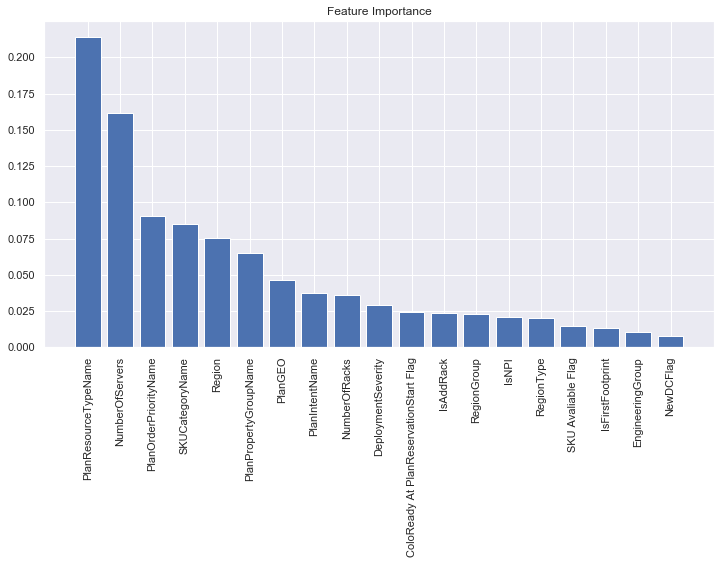

In [73]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(12,6))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(x.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)
# Show plot
plt.show()

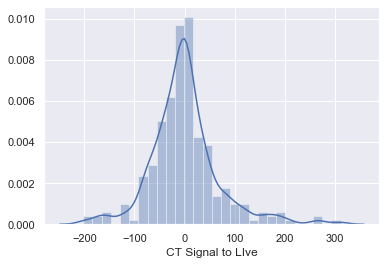

In [75]:
sns.distplot(y_test-y_test_predict)

# Gradient Boosting

In [87]:
# Initialize and fit regressor
gbr=GradientBoostingRegressor(n_estimators=200)         
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [88]:
#prediction
y_train_predict=gbr.predict(x_train)
y_test_predict=gbr.predict(x_test)

In [81]:
#Error calculation
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
train_MAE = mean_absolute_error(y_train, y_train_predict)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
test_MAE = mean_absolute_error(y_test, y_test_predict)
r2 =r2_score (y_test, y_test_predict)

In [89]:
print('rmse_train :',train_rmse, 'MAE_train', train_MAE)
print('rmse_test :',test_rmse, 'MAE_test', test_MAE)
print("r_square:",r2)

rmse_train : 59.6791658480911 MAE_train 40.86274050704877
rmse_test : 72.45546188932897 MAE_test 50.558297410247626
r_square: 0.48260606934199324


In [85]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

gbr1 = GradientBoostingRegressor()
parameters = {
                'n_estimators': [100,200,300,400,500],
                'criterion' : ['mse','friedman_mse'],
                #'max_depth' : [2,3,4,5,6,7,8,None],
                'loss' : ['ls', 'lad', 'huber']
}

cv = GridSearchCV(gbr1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   38.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [86]:
cv.best_params_

{'criterion': 'friedman_mse', 'loss': 'ls', 'n_estimators': 200}